In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('bonn_fullSignal.csv')
data1 = pd.read_csv('bonn_shortSignal.csv')
data2 = pd.read_csv('bonnLabels_fullSignal.csv')
data3 = pd.read_csv('bonnLabels_shortSignal.csv')
# Merge data and data 1
data = pd.concat([data, data1], axis=0)
data2 = pd.concat([data2, data3], axis=0)
data.head()

Saving bonn_fullSignal.csv to bonn_fullSignal.csv
Saving bonn_shortSignal.csv to bonn_shortSignal.csv
Saving bonnLabels_fullSignal.csv to bonnLabels_fullSignal.csv
Saving bonnLabels_shortSignal.csv to bonnLabels_shortSignal.csv
Saving readmeFile.docx to readmeFile.docx
Saving bonnDatasetWorkspace.mat to bonnDatasetWorkspace (1).mat


,34,33,28,22,21,22.1,22.2,19,22.3,18,...,0.678771573691564,0.602792816494662,0.428841400533848,0.236238590493223,0.208059639682874,0.250670330304778,0.262922321948789,0.296892293717791,0.218617804446149,0.230547768691219
0,60.0,47.0,38.0,29.0,28.0,30.0,28.0,30.0,36.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.0,16.0,13.0,12.0,17.0,16.0,7.0,-6.0,-19.0,-25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-41.0,-42.0,-48.0,-48.0,-48.0,-45.0,-44.0,-36.0,-42.0,-43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.0,6.0,-1.0,-13.0,-29.0,-42.0,-53.0,-71.0,-86.0,-94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-15.0,-2.0,0.0,2.0,-2.0,-1.0,-2.0,-7.0,-5.0,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()


In [ ]:
print(data.isnull().sum())
print(data.head())

34                   0
33                   0
28                   0
22                   0
21                   0
                    ..
0.250670330304778    0
0.262922321948789    0
0.296892293717791    0
0.218617804446149    0
0.230547768691219    0
Length: 4271, dtype: int64
Empty DataFrame
Columns: [34, 33, 28, 22, 21, 22.1, 22.2, 19, 22.3, 18, 22.4, 25, 15, 5, 0, -8, -10, -19, -25, -39, -49, -50, -54, -54.1, -59, -63, -64, -58, -53, -39.1, -43, -37, -32, -24, -14, -1, 12, 18.1, 24, 23, 24.1, 25.1, 27, 29, 28.1, 34.1, 44, 57, 64, 80, 83, 86, 76, 60, 47, 40, 42, 42.1, 49, 61, 68, 71, 74, 74.1, 79, 69, 58, 50, 51, 48, 51.1, 51.2, 41, 40.1, 37, 42.2, 40.2, 46, 44.1, 51.3, 42.3, 45, 47.1, 56, 66, 64.1, 61.1, 63, 72, 81, 82, 85, 88, 94, 97, 95, 93, 86.1, 82.1, 69.1, ...]
Index: []

[0 rows x 4271 columns]


In [ ]:
data = pd.read_csv('bonn_fullSignal.csv')
data1 = pd.read_csv('bonn_shortSignal.csv')
labels = pd.read_csv('bonnLabels_fullSignal.csv')
data3 = pd.read_csv('bonnLabels_shortSignal.csv')

data.head()

data = data.dropna()

lumns, types, etc.)
print(data.head())

def segment_data(data, labels, window_size, overlap_size):
    segments = []
    segment_labels = []

    for i in range(0, len(data) - window_size, overlap_size):
        segment = data[i:i+window_size]
        segments.append(segment)
        segment_labels.append(labels[i])
    return np.array(segments), np.array(segment_labels)

segments, segment_labels = segment_data(data.values, labels.values.ravel(), window_size=500, overlap_size=250)

34       0
33       0
28       0
22       0
21       0
        ..
40.52    0
45.52    0
39.66    0
41.53    0
7.46     0
Length: 4097, dtype: int64
   34  33  28  22  21  22.1  22.2  19  22.3  18  ...  21.50  24.50  15.40  \
0  60  47  38  29  28    30    28  30    36  51  ...    546    450    366   
1  26  16  13  12  17    16     7  -6   -19 -25  ...     56     70     77   
2 -41 -42 -48 -48 -48   -45   -44 -36   -42 -43  ...     -4     -4    -11   
3  13   6  -1 -13 -29   -42   -53 -71   -86 -94  ...    -75    -37     36   
4 -15  -2   0   2  -2    -1    -2  -7    -5  -7  ...    -41    -43    -43   

   22.61  31.56  40.52  45.52  39.66  41.53  7.46  
0    296    248    209    177    149    126    42  
1     86     99    113    119    114     99  -130  
2    -13    -15    -23    -28    -30    -23   -13  
3     86    139    167    175    161    129     1  
4    -49    -52    -52    -53    -44    -42   -25  

[5 rows x 4097 columns]


In [ ]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs):
    b, a = butter_bandpass(lowcut, highcut, fs)
    return filtfilt(b, a, data)

In [ ]:
import numpy as np
from scipy.signal import welch
def compute_psd(data, fs)
    f, Pxx = welch(data, fs=fs)
    return f, Pxx

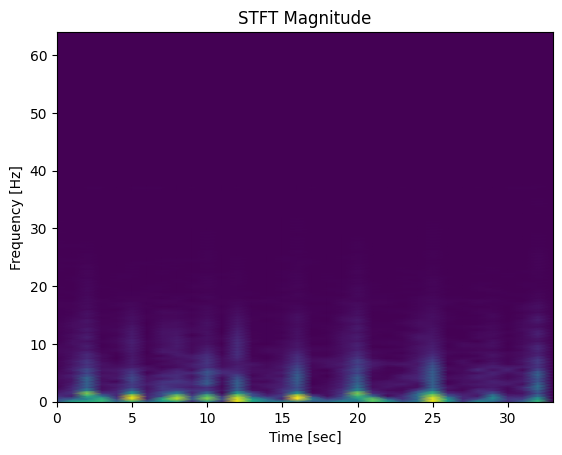

In [ ]:
import numpy as np
from scipy.signal import welch, stft
import matplotlib.pyplot as plt
fs = 128

f, t, Zxx = stft(data.iloc[0], fs=fs)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
from scipy.signal import welch

def compute_psd(segment, fs):
    f, Pxx = welch(segment, fs=fs)
    return f, Pxx

def compute_band_power(f, Pxx, low, high):
    band_idx = np.logical_and(f >= low, f <= high)
    band_power = np.trapz(Pxx[band_idx], f[band_idx])
    return band_power

features = []
for segment in segments:
    f, Pxx = compute_psd(segment, fs)
    delta_power = compute_band_power(f, Pxx, 0.5, 4)
    theta_power = compute_band_power(f, Pxx, 4, 8)
    alpha_power = compute_band_power(f, Pxx, 8, 12)
    beta_power = compute_band_power(f, Pxx, 13, 30)

    features.append([delta_power, theta_power, alpha_power, beta_power])

features = np.array(features)

In [ ]:
import numpy as np
from scipy.signal import welch, stft
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

features = []
for i in range(data.shape[0]):
    f, Pxx = compute_psd(data.iloc[i], fs=128)
    features.append(Pxx)

features = np.array(features)

labels = data['34']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

In [ ]:
X_train = np.expand_dims(segments, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
import scipy.io

mat_data = scipy.io.loadmat('/content/bonnDatasetWorkspace.mat')

print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'fs', 'None', 'normedBonnSignal', 'numEpochs', 'shortBonnMatrix', 'signalBonn', 'window', '__function_workspace__'])


/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Normed Bonn Signal Data:
[[ 0.38961021  0.53312066  0.498036   ...  0.47857691  0.5262896
   0.118509  ]
 [ 0.69054997  0.80397064  0.89107548 ...  1.55767765  1.34378451
   0.44643715]
 [ 0.3129694   0.04350325 -0.06535776 ...  1.80875579  1.55579868
  -1.12229488]
 ...
 [-0.52682251 -0.42643673 -0.40183251 ...  0.12158798  0.10036725
  -0.19919698]
 [ 1.00632685  1.21246964  1.12953141 ... -0.54084265 -0.12541428
   0.89743638]
 [-0.57559601 -1.06019095 -1.6161065  ...  0.45632422  0.19626318
   0.70959808]]


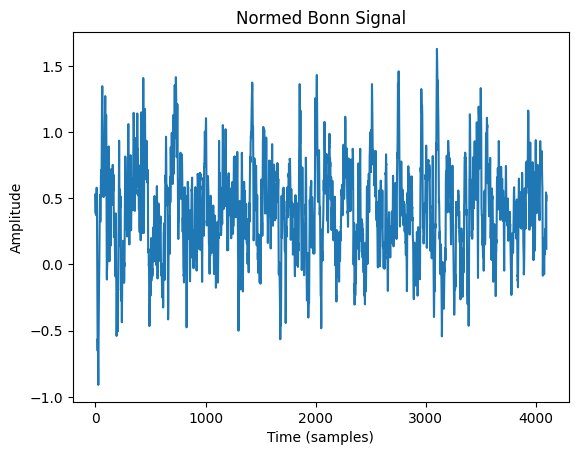

Sampling Frequency (fs): [[173.61]]
Number of Epochs: [[23]]
Short Bonn Matrix:
[[ 0.38961021  0.53312066  0.498036   ...  0.29689229  0.2186178
   0.23054777]
 [ 0.60279282  0.4288414   0.23623859 ...  0.60448139  0.65249089
   0.57407562]
 [ 0.57100043  0.57223944  0.60489851 ... -0.23441825 -0.14970593
  -0.0084437 ]
 ...
 [ 0.02464922 -0.0936009  -0.30071882 ... -0.41337945 -0.32585028
   0.00445113]
 [-0.12809567  0.14329024  0.3476063  ...  0.03098089  0.1693676
   0.25795627]
 [-0.14338762 -0.24558477 -0.22905474 ... -0.10098088 -0.28539471
  -0.43508004]]
Window Data: [[174]]
Raw Bonn Signal:
[[  34   33   28 ...   39   41    7]
 [  60   47   38 ...  149  126   42]
 [  26   16   13 ...  114   99 -130]
 ...
 [ -51  -42  -39 ...   -2    0  -49]
 [  56   55   38 ...  -32   -4   69]
 [ -36  -71 -120 ...    3  -13   30]]


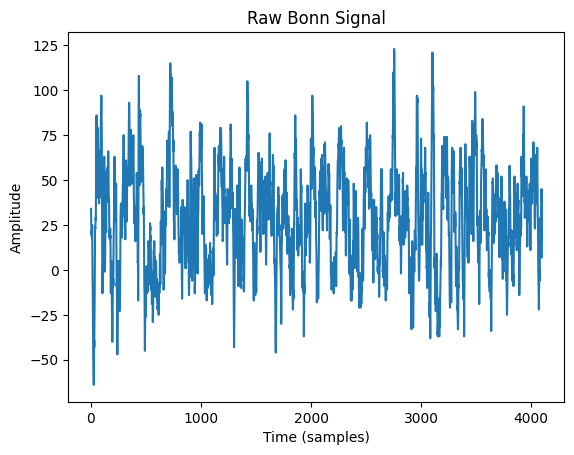

In [ ]:
if 'normedBonnSignal' in mat_data:
    normed_signal = mat_data['normedBonnSignal']
    print("Normed Bonn Signal Data:")
    print(normed_signal)

    if normed_signal.ndim == 2:
        plt.plot(normed_signal[0, :])
        plt.title('Normed Bonn Signal')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.show()

if 'fs' in mat_data:
    fs = mat_data['fs']
    print("Sampling Frequency (fs):", fs)
else:
    print("'fs' variable not found.")

if 'numEpochs' in mat_data:
    num_epochs = mat_data['numEpochs']
    print("Number of Epochs:", num_epochs)
else:
    print("'numEpochs' variable not found.")

if 'shortBonnMatrix' in mat_data:
    short_matrix = mat_data['shortBonnMatrix']
    print("Short Bonn Matrix:")
    print(short_matrix)

if 'window' in mat_data:
    window = mat_data['window']
    print("Window Data:", window)

if 'signalBonn' in mat_data:
    signal_bonn = mat_data['signalBonn']
    print("Raw Bonn Signal:")
    print(signal_bonn)

if 'signalBonn' in mat_data and signal_bonn.ndim == 2:
    plt.plot(signal_bonn[0, :])
    plt.title('Raw Bonn Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
full_data = pd.read_csv('bonn_fullSignal.csv')
short_data = pd.read_csv('bonn_shortSignal.csv')
full_label = pd.read_csv('bonnLabels_fullSignal.csv')
short_label = pd.read_csv('bonnLabels_shortSignal.csv')


target_column_name = 1

X = full_data.values
y = full_label.iloc[:, target_column_name].values
y = le.fit_transform(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

class SeizureDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = SeizureDataset(X_train, y_train)
val_dataset = SeizureDataset(X_val, y_val)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
for X,y in train_loader:
  print(X.shape)
  print(y.shape, y.type)

torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff4ea3aca0>
torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff508c0590>
torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff508c1f30>
torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff508c1300>
torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff508c2160>
torch.Size([64, 4097])
torch.Size([64]) <built-in method type of Tensor object at 0x7cff508c2930>
torch.Size([15, 4097])
torch.Size([15]) <built-in method type of Tensor object at 0x7cff4ea83290>


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        # Define the layers
        self.layers = nn.Sequential(
          nn.Linear(input_dim, 128),
          nn.ReLU(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, 1),
          nn.ReLU(),
        )


    def forward(self, x):
        return self.layers(x)


In [ ]:
# Initialize the model
input_dim = X_train.shape[1]
model = MLPModel(input_dim)


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        labels = labels.float()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        predicted = (outputs > 0.5).long()
        correct_preds += (predicted == labels.long()).sum().item()
        total_preds += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_preds / total_preds
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    model.eval()
    val_loss = 0.0
    val_correct_preds = 0
    val_total_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            labels = (labels > 0).type(torch.float32)

            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            predicted = (outputs > 0.5).long()
            val_correct_preds += (predicted == labels.long()).sum().item()
            val_total_preds += labels.size(0)

    val_loss /= len(val_loader) #over 1
    val_acc = val_correct_preds / val_total_preds
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Epoch 1/200, Loss: 48.8979, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 2/200, Loss: 49.1052, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 3/200, Loss: 47.8616, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 4/200, Loss: 48.6907, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 5/200, Loss: 48.8979, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 6/200, Loss: 48.2762, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 7/200, Loss: 48.6907, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 8/200, Loss: 48.6907, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 9/200, Loss: 49.3125, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 10/200, Loss: 48.6907, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 11/200, Loss: 48.8979, Accuracy: 0.7920
Validation Loss: 33.0490, Accuracy: 0.8300
Epoch 12/200, Loss: 48.6907, A

In [ ]:
from sklearn.metrics import classification_report

# Evaluation on validation data
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs).squeeze()
        predicted = (outputs > 0.5).long()
        y_pred.extend(predicted.numpy())

        y_true.extend((labels > 0).long().numpy())

print(classification_report(y_true, y_pred, target_names=["Non-seizure", "Seizure"]))

              precision    recall  f1-score   support

 Non-seizure       0.83      1.00      0.91        83
     Seizure       0.00      0.00      0.00        17

    accuracy                           0.83       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.69      0.83      0.75       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
